In [ ]:
### A MDP: ### Actions considered

### MDP: {P,S,A,R,gamma}

### MDP + policy = MRP

### MRP does not include actions decision. For a particular state there is one action only which is fixed

### MDP gives us the decision to choose an action at a particular state.

### Policy is the final strategy that provides which action to take on which state

### Once that is decided, For MDP also we get one fixed action for a state. 
### So it yields a MRP.

### We detect how good a policy is by calculating the value fuuctions. More the value functions for the MRP formed by a 
### policy pi, better is the policy.


### Problem

In [1]:
import matplotlib.pyplot as plt
import cv2

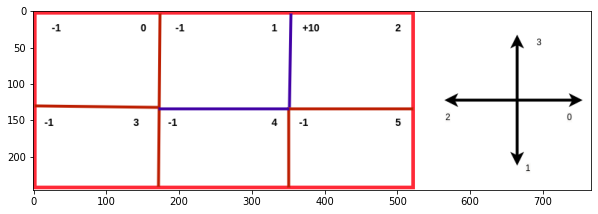

In [3]:
img=cv2.imread("MDP_Policy_iteration.png")
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()

### Formulation

In [5]:
import numpy as np


In [ ]:
### How to represent an MDP by definition (P,S,A,R,gamma)

In [ ]:
### Dimension for MDP: 
###            P: A x S x S
###            R: A x S x 1

### Dimension for MRP: 
###            P: S x S
###            R: S x 1

### So for every action we get a Transistion and a Reward Matrix. 
### For an action, the transition matrix represents the probability of transition to other states
### if the agent takes that action at that particular state.

"""
[0,1,0,0,0,0],
[0,1,0,0,0,0],
[0,0,1,0,0,0],
[0,0,0,0,1,0],
[0,0,0,0,0,1],
[0,0,0,0,0,1],
"""

### For example, for the above problem, the above given matrix is the transition matrix, under the action 0.

### As we can see, if we take action 0 at state 0, we move to state 1. So, for the state 0, the above matrix 
### shows transition probability = 1 for state 1, under action 1 on state 0 and so on.

### As there is a wall, action 0 on state 1, keeps the agent in the same state. So, in the second row of the 
### matrix it remains in 1

### Similarly Reward matrix:
"""
[-1],
[-1],
[10],
[-1],
[-1],
[-1]
"""

### If we take action 0 on state 0 we move to state 1, and the reward is -1. so, the reward value for state 0
### under action 0 is -1. Similarly, if we take action 0 on state 2, there is no movement, so the agent stays 
### in state 2, the goal state, So the corresponding reward achieved is +10.

In [6]:
P_tr=np.array([
    [
        [0,1,0,0,0,0],
        [0,1,0,0,0,0],
        [0,0,1,0,0,0],
        [0,0,0,0,1,0],
        [0,0,0,0,0,1],
        [0,0,0,0,0,1],
    ],
    [
        [0,0,0,1,0,0],
        [0,1,0,0,0,0],
        [0,0,0,0,0,1],
        [0,0,0,1,0,0],
        [0,0,0,0,1,0],
        [0,0,0,0,0,1],
    ],
    [
        [1,0,0,0,0,0],
        [1,0,0,0,0,0],
        [0,0,1,0,0,0],
        [0,0,0,1,0,0],
        [0,0,0,1,0,0],
        [0,0,0,0,1,0],
    ],
    [
        [1,0,0,0,0,0],
        [0,1,0,0,0,0],
        [0,0,1,0,0,0],
        [1,0,0,0,0,0],
        [0,0,0,0,1,0],
        [0,0,1,0,0,0],
    ],
    
])        ###  Transition matrix for each state under each action
R_tr=np.array([
    [
        [-1],
        [-1],
        [10],
        [-1],
        [-1],
        [-1]
    ],
    [
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1]
    ],
    [
        [-1],
        [-1],
        [10],
        [-1],
        [-1],
        [-1]
    ],
    [
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [10]
    ],
])      ###  Reward matrix for each state under each action

gamma=0.9      ### Gamma

actions=[0,1,2,3]     ### Action set
states=[0,1,2,3,4,5]      ###  State space


### Policy Enumeration

In [ ]:
### Policy Enumeration is a naive approach

### It consists of generating all the possible policies, and enumerating through them all
### to find the best policy, by comparing the value functions of the MRPs formed by their corresponding 
### Policies.


In [23]:
### Obtaining the MRP:
### As we know, we need an MRP to obtain a value funtion, and MDP + policy = MRP 

### Devise a policy: 

### ex: [1,2,3,1,3,2], is a policy as it has an action for each step.

### So, we first obtain the tranisition matrix, corresponding to all the action in our poicy
### We can find it as:

### P_tr[policy,:,:]

"""array([[[0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1]],

       [[1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0]],

       [[1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0]],

       [[0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1]],

       [[1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0]],

       [[1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0]]])
"""

## It gives the above result. It represents the transition matrix for each action in policy

### But for an action, we only need the transition vector for that particular state, on which the action is 
### being taken. So, from the first transition matrix, we only need the 1st row, as it is the action on state 0

### P_tr[policy,states,:] gives us the actual required MRP defn.
"""
array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0]])
       """

### The above is the MRP formed from the MDP under policy pi

### Similarly, we obtain the reward for the MRP under policy pi.


In [29]:
import itertools

In [30]:
def generate_possible_policies(states,actions):   ### Generating all possible policies
  policies=list(itertools.product(actions,repeat=len(states)))  ### Using permutations
  return policies

In [37]:
def obtain_value(policy,Transition_matrix,Reward_matrix,gamma,states):
  Trans_mat_MRP=Transition_matrix[policy,states,:]
  Rewards_mat_MRP=Reward_matrix[policy,states,:]
  ### Extracting the MRP from the MDP on the particular policy

  Identity=np.identity(Trans_mat_MRP.shape[0])
  Value_func= np.matmul(np.matrix(Identity - gamma*Trans_mat_MRP).I,Rewards_mat_MRP).sum()
  ### Value function calculated using analytical method

  return Value_func


In [38]:
def get_best_policy(actions,states,Transition_Matrix,Reward_Matrix,gamma):

  policies=generate_possible_policies(states,actions) ### Generating all the policies
  results=[] ### To store the policies and the corresponding value 

  for policy in policies:

    ### Enumerating through all the policies and generate value function for each policy.
    results.append((policy,obtain_value(policy,Transition_Matrix,Reward_Matrix,gamma,states)))

  sorted_policies=sorted(results,key=lambda e: e[1])
  ### Sorting the results on the basis of value from lowest to highest.

  best_policy=sorted_policies[-1]  ### Accessing last one with highest value

  return best_policy,results


In [39]:
best_policy,results=get_best_policy(actions,states,P_tr,R_tr,gamma)

In [40]:
best_policy

((1, 2, 2, 0, 0, 3), 500.46100000000007)

In [ ]:
### So the above is the best found policy.

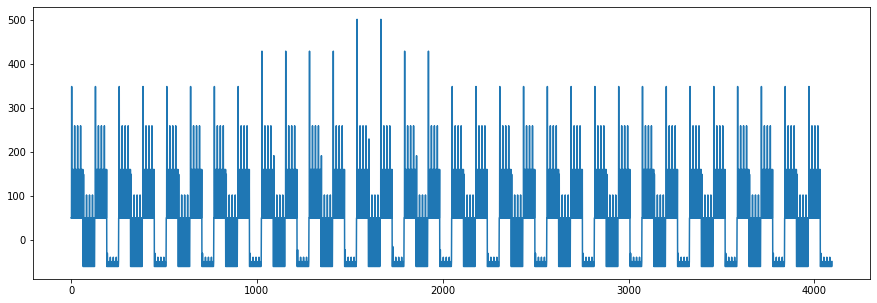

In [41]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
plt.plot([i for i,e in enumerate(results)],[e[1] for e in results])

In [ ]:
### The above is the plot 
### WE can see the highest was achieved at around 1200th policy. But still we had to test them all.